In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

/home/entity/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:279: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
sns.set_context("poster")
sns.set_style("ticks")

In [3]:
df = pd.read_csv("/home/entity/Downloads/BigQuery_GDELT_INDIA_Target.csv")

In [4]:
df.head()

,Year,Target,QuadClass,TotalEvents
0,2017,USA,1,3725
1,2017,GBR,1,1741
2,2017,PAK,1,1631
3,2017,CHN,1,1512
4,2017,PAK,4,894


In [5]:
QUAD_CLASS_NAMES={
    1: "Verbal Cooperation",
    2: "Material Cooperation",
    3: "Verbal Conflict",
    4: "Material Conflict"
}

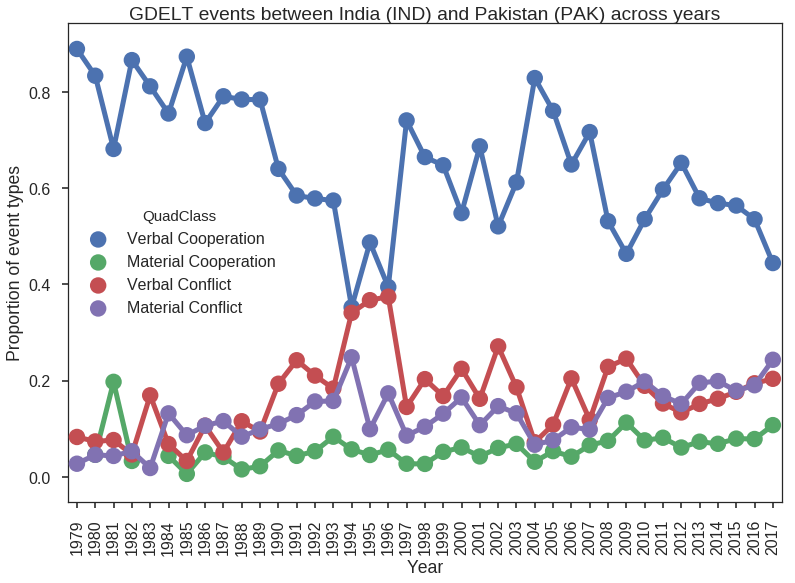

In [6]:
df_t = df[(df.Target == "PAK")].pivot_table(index="Year", columns="QuadClass", values="TotalEvents", aggfunc=np.mean)

ax = sns.pointplot(x="Year", y="TotalEvents", hue="QuadClass",
                   order=df_t.index.sort_values(),
           data=pd.melt(df_t.divide(df_t.sum(axis=1), axis=0).reset_index(),
        id_vars=["Year"],
        value_vars=[1,2,3,4],
       value_name="TotalEvents").assign(
    QuadClass=lambda x: x.apply(lambda k: QUAD_CLASS_NAMES[k.QuadClass], axis=1)
)
                  )


plt.xticks(rotation='vertical')
plt.ylabel("Proportion of event types")
plt.xlabel("Year")
plt.title("GDELT events between India (IND) and Pakistan (PAK) across years")

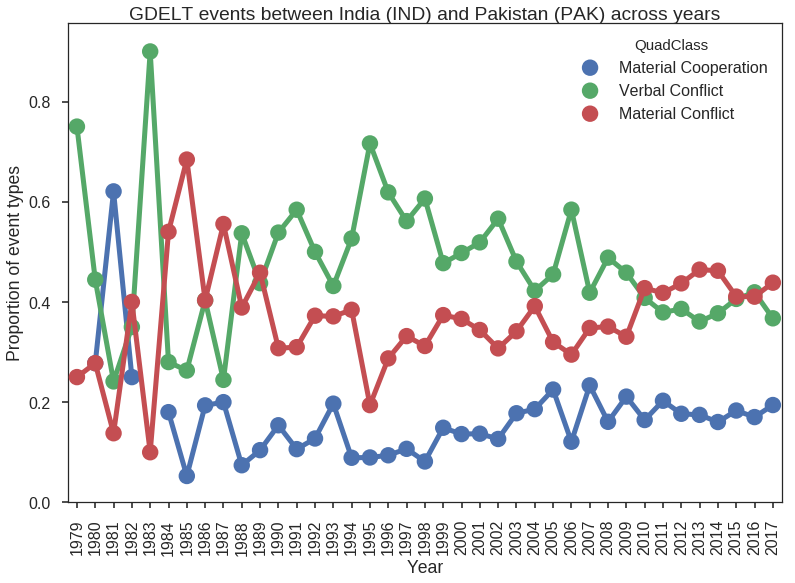

In [7]:
df_t = df[(df.Target == "PAK") &
          (df.QuadClass != 1)].pivot_table(
    index="Year",
    columns="QuadClass",
    values="TotalEvents", aggfunc=np.mean)

ax = sns.pointplot(x="Year", y="TotalEvents", hue="QuadClass",
                   order=df_t.index.sort_values(),
           data=pd.melt(df_t.divide(df_t.sum(axis=1), axis=0).reset_index(),
        id_vars=["Year"],
        value_vars=[2,3,4],
       value_name="TotalEvents").assign(
    QuadClass=lambda x: x.apply(lambda k: QUAD_CLASS_NAMES[k.QuadClass], axis=1)
)
                  )


plt.xticks(rotation='vertical')
plt.ylabel("Proportion of event types")
plt.xlabel("Year")
plt.title("GDELT events between India (IND) and Pakistan (PAK) across years")

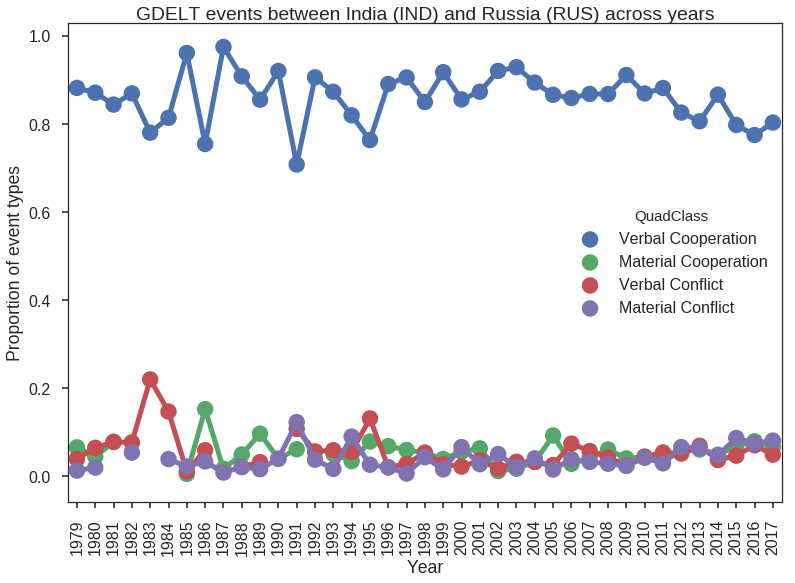

In [8]:
df_t = df[(df.Target == "RUS")].pivot_table(
    index="Year",
    columns="QuadClass",
    values="TotalEvents", aggfunc=np.mean)

ax = sns.pointplot(x="Year", y="TotalEvents", hue="QuadClass",
                   order=df_t.index.sort_values(),
           data=pd.melt(df_t.divide(df_t.sum(axis=1), axis=0).reset_index(),
        id_vars=["Year"],
        value_vars=[1, 2,3,4],
       value_name="TotalEvents").assign(
    QuadClass=lambda x: x.apply(lambda k: QUAD_CLASS_NAMES[k.QuadClass], axis=1)
)
                  )


plt.xticks(rotation='vertical')
plt.ylabel("Proportion of event types")
plt.xlabel("Year")
plt.title("GDELT events between India (IND) and Russia (RUS) across years")

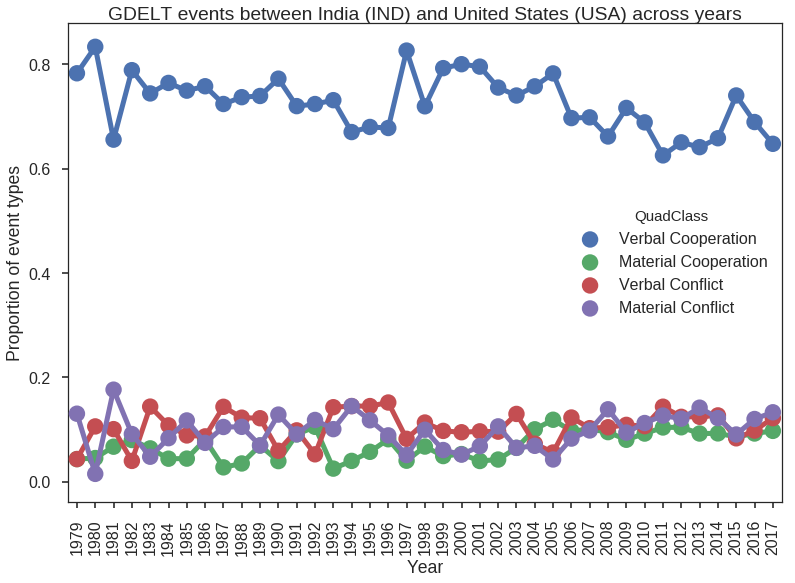

In [9]:
df_t = df[(df.Target == "USA")].pivot_table(
    index="Year",
    columns="QuadClass",
    values="TotalEvents", aggfunc=np.mean)

ax = sns.pointplot(x="Year", y="TotalEvents", hue="QuadClass",
                   order=df_t.index.sort_values(),
           data=pd.melt(df_t.divide(df_t.sum(axis=1), axis=0).reset_index(),
        id_vars=["Year"],
        value_vars=[1, 2,3,4],
       value_name="TotalEvents").assign(
    QuadClass=lambda x: x.apply(lambda k: QUAD_CLASS_NAMES[k.QuadClass], axis=1)
)
                  )


plt.xticks(rotation='vertical')
plt.ylabel("Proportion of event types")
plt.xlabel("Year")
plt.title("GDELT events between India (IND) and United States (USA) across years")

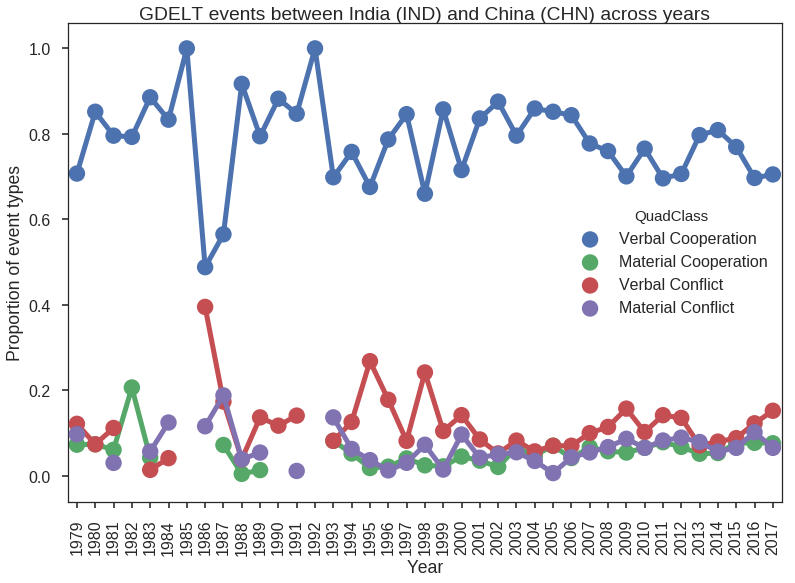

In [10]:
df_t = df[(df.Target == "CHN")].pivot_table(
    index="Year",
    columns="QuadClass",
    values="TotalEvents", aggfunc=np.mean)

ax = sns.pointplot(x="Year", y="TotalEvents", hue="QuadClass",
                   order=df_t.index.sort_values(),
           data=pd.melt(df_t.divide(df_t.sum(axis=1), axis=0).reset_index(),
        id_vars=["Year"],
        value_vars=[1, 2,3,4],
       value_name="TotalEvents").assign(
    QuadClass=lambda x: x.apply(lambda k: QUAD_CLASS_NAMES[k.QuadClass], axis=1)
)
                  )


plt.xticks(rotation='vertical')
plt.ylabel("Proportion of event types")
plt.xlabel("Year")
plt.title("GDELT events between India (IND) and China (CHN) across years")

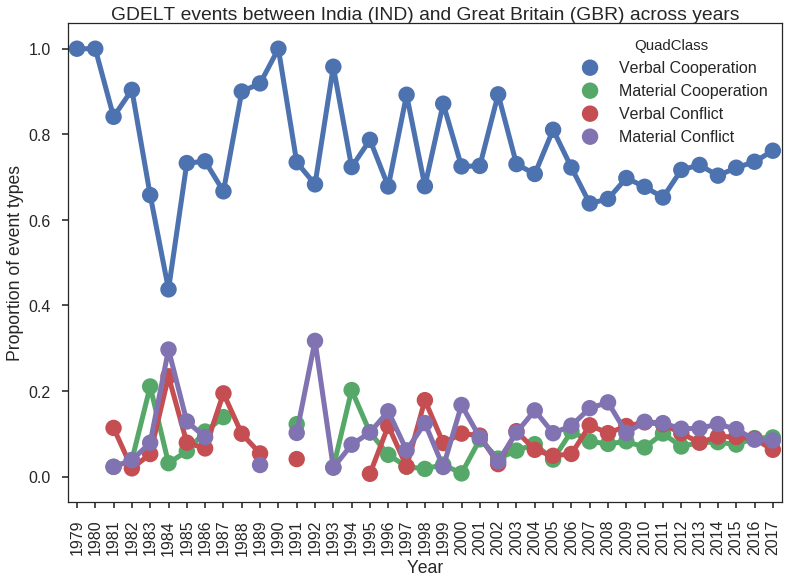

In [11]:
df_t = df[(df.Target == "GBR")].pivot_table(
    index="Year",
    columns="QuadClass",
    values="TotalEvents", aggfunc=np.mean)

ax = sns.pointplot(x="Year", y="TotalEvents", hue="QuadClass",
                   order=df_t.index.sort_values(),
           data=pd.melt(df_t.divide(df_t.sum(axis=1), axis=0).reset_index(),
        id_vars=["Year"],
        value_vars=[1, 2,3,4],
       value_name="TotalEvents").assign(
    QuadClass=lambda x: x.apply(lambda k: QUAD_CLASS_NAMES[k.QuadClass], axis=1)
)
                  )


plt.xticks(rotation='vertical')
plt.ylabel("Proportion of event types")
plt.xlabel("Year")
plt.title("GDELT events between India (IND) and Great Britain (GBR) across years")

In [12]:
df.groupby("Target")["TotalEvents"].sum().sort_values(ascending=False).head(10)

Target
PAK    219798
USA    190428
CHN     72053
GBR     58141
BGD     49788
LKA     39145
NPL     30611
RUS     26132
JPN     23964
AFG     21588
Name: TotalEvents, dtype: int64